### Risk-neutral pricing of call-options using price simulations

Options are a form of financial derivative that pays off a premium $ S_T - K $ if $ S_T > K $ otherwise zero. $K$ is called the strike price. At time-0 you are given the right (but not the obligation) to buy the stock to price $K$ at time-T. If $S_T > K$, buy the stock for price $K$ and imidiatly sell it for price $S_T$ and make $S_T - K$ profit, if not, don't use your option. 

For this to be a fair game, the call-option buyer needs to pay a premium at time-0 to have this option at time-T. What is this premium?

Let total maturity be $\tau = T\Delta t$.

---

$ 
\textbf{(1) Objects / shapes}
$

- $S \in \mathbb{R}^{N\times (T+1)}$ : simulated price matrix (each row is a path).  
  - Terminal prices (column $i$): $ S_{i,T} \in \mathbb{R}^N$.

- Payoff vector (European call, strike $K$):  
  $ 
  C^{\text{pay}} \in \mathbb{R}^N,\qquad C^{\text{pay}}_i=\max(S_{i,T}-K,\,0).
  $


- Estimator (Monte–Carlo price):
  $
  \hat C_0 = \frac{1}{N}\mathbf{1}^\top e^{-r\tau} C^{\text{pay}} = \frac{1}{N}\sum_{i=1}^N e^{-r\tau}\max(S_{i, T}-K,0).
  $
  (Here $\mathbf{1}\in\mathbb{R}^N$ is the all-ones vector.)

- Sample standard error using sample variance $\widehat{\sigma}^2 = \frac{1}{N-1}\sum_{i=1}^{N}(\tilde C_i-\hat C_0)^2 $

---

$ 
\textbf{(2) Risk-neutral pricing principle}
$

- Under the risk-neutral probability measure $\mathbb{P}$ the discounted price process is a martingale. The risk-neutral pricing formula for an arbitrary payoff $H(S_T)$ is:
  $
  C_0 = e^{-r\tau}\,\mathbb{E}^{\mathbb{P}}[H(S_T)].
  $

---

$ 
\textbf{(3) One-step binomial (two-state) example — algebraic pricing}
$

- Single-step factors: up factor $u$, down factor $d$, $S_u$ and $S_d$. Maturity $\tau$ (one step).  

- Risk-neutral price:
  $
  S_0 = e^{-r\tau}\,\mathbb{E}^{\mathbb{P}}[S_T] = e^{-r\tau}\left(p S_u + (1-p) S_d\right).
  $

- Risk-neutral probability $p$:
  $
  p = \frac{S_0e^{r\tau}-S_d}{S_u-S_d}.
  $

- For a call with terminal payoffs $C_u=\max(S_u-K,0)$ and $C_d=\max(S_d-K,0)$:
  $
  C_0 = e^{-r\tau}\left(p C_u + (1-p) C_d\right).
  $

This shows equivalence of (i) replication pricing and (ii) risk-neutral expectation.




In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import statsmodels.api as sm

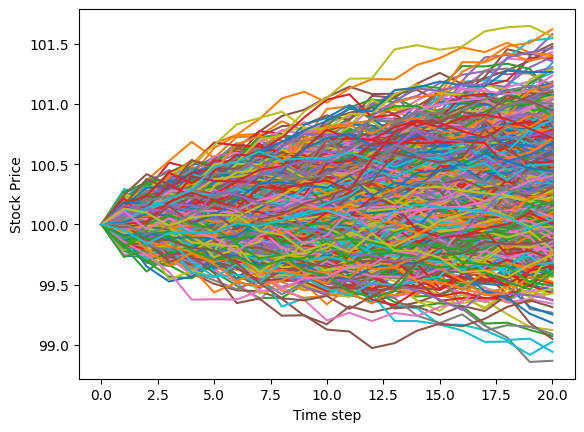

Call option price: 0.38 +- 0.01


In [9]:
# Parameters
r = 0.0425
sd = 0.015
T = 20  # number of time steps
N = 1000
dt = 1/255
t = np.arange(T+1)
S_0 = 100
K=100

w = np.random.normal(0, 1, size=(N, T))

S_t = np.zeros((N,T+1))
S_t[:,0] = S_0
C_0 = np.zeros(N)

for i in range(N):
    S_t[i,1:] = S_0*np.exp(np.cumsum((r - 0.5 * (sd**2))*dt + sd*np.sqrt(dt)*w[i,:]))
    C_0[i] = np.exp(-r*T*dt)*max(S_t[i,T] - K, 0)

for i in range(N):
    plt.plot(t, S_t[i])
plt.xlabel("Time step")
plt.ylabel("Stock Price")
plt.show()

print(f"Call option price: {round(1/N*np.sum(C_0), 2)} +- {round(np.sqrt(1/(N-1)*np.var(C_0)), 2)}")

# Black-Scholes Formula for European Call Option

We aim to compute the theoretical price of a European call option.

---

## 1. Black-Scholes Model Assumptions

Let the stock price $S_t$ follow a **Geometric Brownian Motion (GBM)** under the risk-neutral measure:

$
dS_t = r S_t dt + \sigma S_t dW_t
$

where:
- $r$ = risk-free interest rate (continuously compounded)
- $\sigma$ = volatility of the stock
- $W_t$ = standard Wiener process
- $S_0$ = current stock price

The option is **European**, with maturity $T$ and strike $K$.

---

## 2. Black-Scholes Partial Differential Equation

The price of the option $C(S,t)$ satisfies the PDE:

$
\frac{\partial C}{\partial t} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 C}{\partial S^2} + r S \frac{\partial C}{\partial S} - r C = 0
$

with boundary condition at maturity:

$
C(S,T) = \max(S_T - K, 0)
$

---

## 3. Black-Scholes Analytical Solution

The **closed-form solution** for a European call is:

$
C_0 = S_0 N(d_1) - K e^{-rT} N(d_2)
$

where:

$
d_1 = \frac{\ln(S_0/K) + \left(r + \frac{\sigma^2}{2}\right) T}{\sigma \sqrt{T}}, 
\quad
d_2 = d_1 - \sigma \sqrt{T}
$

and $N(\cdot)$ is the **cumulative distribution function (CDF)** of the standard normal distribution.

---

## 4. Connection to Monte Carlo Simulations

Alternatively, the **risk-neutral price** can be approximated as:

$
C_0 \approx e^{-rT} \mathbb{E}^{\mathbb{Q}} \big[ \max(S_T - K, 0) \big]
$

where $S_T$ is simulated under the **risk-neutral drift**:

$
S_{t+1} = S_t \exp\left( \left(r - \frac{1}{2}\sigma^2\right) \Delta t + \sigma \sqrt{\Delta t}\, Z_t \right)
$

with $Z_t \sim N(0,1)$ i.i.d. and $\Delta t = 1/255$ for daily steps.

---

## 5. Parameters Example

Using the given parameters:

- Risk-free rate: $r = 0.0425$
- Volatility: $\sigma = 0.015$
- Maturity: $T = 20$ days, i.e., $T_{\text{years}} = \frac{20}{255}$
- Current stock price: $S_0 = 100$
- Strike price: $K = 100$

The Black-Scholes formula for a European call option gives:

$
C_0 = S_0 \, N(d_1) - K \, e^{-r T_{\text{years}}} \, N(d_2)
$
where

$
d_1 = \frac{\ln(S_0/K) + \left(r + \frac{\sigma^2}{2}\right) T_{\text{years}}}{\sigma \sqrt{T_{\text{years}}}}, \quad
d_2 = d_1 - \sigma \sqrt{T_{\text{years}}}
$
and $N(\cdot)$ is the cumulative distribution function of the standard normal distribution.


In [10]:
S0 = 100        # Current stock price
K = 100         # Strike price
r = 0.0425      # Risk-free rate
sigma = 0.015   # Volatility
T_days = 20     # Time to maturity in days
T = T_days / 255  # Convert to years assuming 255 trading days

# Black-Scholes d1 and d2
d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)

# Call option price
C0 = S0 * stats.norm.cdf(d1) - K * np.exp(-r * T) * stats.norm.cdf(d2)
C0

0.38377217667218133